In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

In [57]:
#data = pd.read_csv(r'C:\Users\jerem\Documents\Python Scripts\Scania\mini_data.csv', sep="\t")
data = pd.read_csv(r'C:\Users\jerem\Documents\Python Scripts\Scania\Original_Raw_Data.csv', sep="\t")

C:\Users\jerem\anaconda3\envs\finance\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Extract useful data

In [59]:
clean_data = data[['KVSV1', 'OTGT1', 'OTGT6', 'OTSV1', 'QV11', 'TV11', 'TV12', 'TV_Cmd']]
clean_data

,KVSV1,OTGT1,OTGT6,OTSV1,QV11,TV11,TV12,TV_Cmd
0,70,"28,71","34,01","6,388","9,3559999465942383","40,35","28,89",20
1,70,"28,71","34,01","6,388","9,3559999465942383","40,35","28,89",20
2,70,"28,71","34,01","6,388","9,3559999465942383","40,35","28,89",20
3,70,"28,71","34,01","6,388","9,3559999465942383","40,35","28,89",20
4,70,"28,69","34,01","6,388","9,3559999465942383","40,35","28,89",20
...,...,...,...,...,...,...,...,...
1614717,"6,7","61,21","76,25","32,1","8,8500003814697266","62,85","61,34",60
1614718,"6,7","61,21","76,25","32,1","8,8500003814697266","62,85","61,34",60
1614719,"6,7","61,25","76,25","32,1","8,8500003814697266","62,85","61,34",60
1614720,"6,7","61,25","76,25","32,1","8,8500003814697266","62,85","61,34",60


## change to correct data format

In [60]:
for i in range(len(clean_data[['KVSV1']])):
    if clean_data.at[i, 'KVSV1'].find(',') == -1:
        clean_data.at[i, 'KVSV1'] = int(clean_data.at[i, 'KVSV1'])
    else:
        clean_data.at[i, 'KVSV1'] = round(float(clean_data.at[i, 'KVSV1'].replace(',', '.')), 2)
    
for i in range(len(clean_data[['OTGT1']])):
    clean_data.at[i, 'OTGT1'] = round(float(clean_data.at[i, 'OTGT1'].replace(',', '.')), 2)
    
for i in range(len(clean_data[['OTGT6']])):
    clean_data.at[i, 'OTGT6'] = round(float(clean_data.at[i, 'OTGT6'].replace(',', '.')), 2)

In [70]:
for i in range(len(clean_data[['OTSV1']])):
    clean_data.at[i, 'OTSV1'] = float(str(clean_data.at[i, 'OTSV1']).replace(',', '.'))
    

In [61]:
for i in range(len(clean_data[['QV11']])):
    clean_data.at[i, 'QV11'] = round(float(clean_data.at[i, 'QV11'].replace(',', '.')), 3)
    
for i in range(len(clean_data[['TV11']])):
    clean_data.at[i, 'TV11'] = round(float(clean_data.at[i, 'TV11'].replace(',', '.')), 2)
    
for i in range(len(clean_data[['TV12']])):
    clean_data.at[i, 'TV12'] = round(float(clean_data.at[i, 'TV12'].replace(',', '.')), 2)
    
for i in range(len(clean_data[['TV_Cmd']])):
    clean_data.at[i, 'TV_Cmd'] = int(clean_data.at[i, 'TV_Cmd'])

In [77]:
clean_data = clean_data.reindex(index=clean_data.index[::-1])
clean_data

,KVSV1,OTGT1,OTGT6,OTSV1,QV11,TV11,TV12,TV_Cmd
1614721,6.7,61.25,76.25,32.1,8.85,62.85,61.34,60
1614720,6.7,61.25,76.25,32.1,8.85,62.85,61.34,60
1614719,6.7,61.25,76.25,32.1,8.85,62.85,61.34,60
1614718,6.7,61.21,76.25,32.1,8.85,62.85,61.34,60
1614717,6.7,61.21,76.25,32.1,8.85,62.85,61.34,60
...,...,...,...,...,...,...,...,...
4,70,28.69,34.01,6.388,9.356,40.35,28.89,20
3,70,28.71,34.01,6.388,9.356,40.35,28.89,20
2,70,28.71,34.01,6.388,9.356,40.35,28.89,20
1,70,28.71,34.01,6.388,9.356,40.35,28.89,20


In [80]:
clean_data.to_csv(r'C:\Users\jerem\Documents\Python Scripts\Scania\clean_data.csv', index=False, encoding='utf-8')

# Plot Data
## Variable names:
KVSV1  :  Valve Cooling Temp       <br>
OTGT1  :  Temp into heat exchanger <br>
OTGT6  :  Valve Heataing Temp      <br>
OTSV1  :  3-way valve Heat/Cool %  <br>
QV11   :  Flow Liter/Min           <br>
TV11   :  Temp exiting gearbox     <br>
TV12   :  Temp entering gearbox    <br>
TV_Cmd :  Setpoint for TV11/TV12   <br>

## Input Command, Input percentage, Output Temp

<AxesSubplot:>

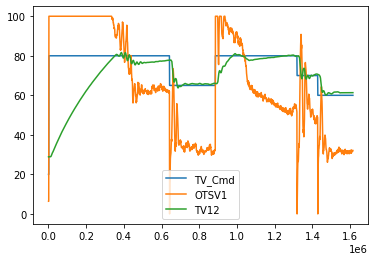

In [78]:
plot_data0 = clean_data[['TV_Cmd', 'OTSV1', 'TV12']].iloc[::1000,:]
plot_data0.plot()

## Temp In/Out Gearbox

<AxesSubplot:>

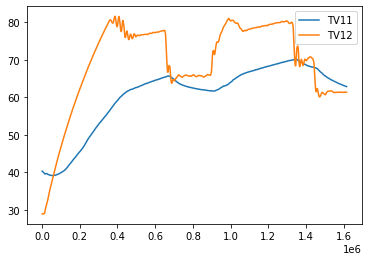

In [81]:
plot_data0 = clean_data[['TV11', 'TV12']].iloc[::1000,:]
plot_data0.plot()

## Heating and Cooling Valve Temperatures

<AxesSubplot:>

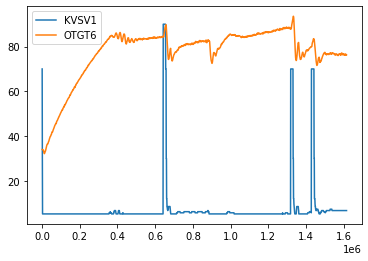

In [79]:
plot_data2 = clean_data[['KVSV1', 'OTGT6']].iloc[::1000,:]
plot_data2.plot()